In [1]:
import requests
from IPython.display import Image, display, clear_output
import time
from urllib.parse import urlencode
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

%matplotlib inline


In [2]:
# Function to set motors
def set_motors(jetbot_ip, left_speed, right_speed):
    params = {'left': left_speed, 'right': right_speed}
    url = f'http://{jetbot_ip}:8080/set_motors?{urlencode(params)}'
    response = requests.get(url)
    if response.status_code == 200:
        print("Motors set successfully")
    else:
        print("Failed to set motors")

In [3]:
# Function to execute left command
def move_left(jetbot_ip, speed):
    params = {'speed': speed}
    url = f'http://{jetbot_ip}:8080/left?{urlencode(params)}'
    response = requests.get(url)
    if response.status_code == 200:
        print("Left command executed successfully")
    else:
        print("Failed to execute left command")

In [4]:
# Function to execute right command
def move_right(jetbot_ip, speed):
    params = {'speed': speed}
    url = f'http://{jetbot_ip}:8080/right?{urlencode(params)}'
    response = requests.get(url)
    if response.status_code == 200:
        print("Right command executed successfully")
    else:
        print("Failed to execute right command")

In [5]:
# Function to execute forward command
def move_forward(jetbot_ip, speed):
    params = {'speed': speed}
    url = f'http://{jetbot_ip}:8080/forward?{urlencode(params)}'
    response = requests.get(url)
    if response.status_code == 200:
        print("Forward command executed successfully")
    else:
        print("Failed to execute forward command")

In [6]:
# Function to execute stop command
def stop_robot(jetbot_ip):
    url = f'http://{jetbot_ip}:8080/stop'
    response = requests.get(url)
    if response.status_code == 200:
        print("Stop command executed successfully")
    else:
        print("Failed to execute stop command")

In [7]:

# Function to display continuous camera stream
def display_camera_stream(jetbot_ip):
    while True:
        response = requests.get(f'http://{jetbot_ip}:8080/camera')
        image = Image(response.content)
        clear_output(wait=True)
        display(image)
        time.sleep(0.1) # Adjust the sleep time to control the frame rate
        
def print_camera(jetbot_ip):
    url = f'http://{jetbot_ip}:8080/camera'
    
    while True:
        response = requests.get(url)
        img_array = np.frombuffer(response.content, dtype=np.uint8)
        image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

        # # Define HSV range for the color (red in this case)
        # lower_color = np.array([0, 120, 70])    # Lower bound of red
        # upper_color = np.array([10, 255, 255])  # Upper bound of red

        # HSV color range for pink
        lower_color = np.array([140, 50, 50])  # Lower bound of pink in HSV
        upper_color = np.array([170, 255, 255])  # Upper bound of pink in HSV


        if image is not None:

            # Convert the image to RGB
            rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Create mask for the color
            mask = cv2.inRange(rgb, lower_color, upper_color)

            # Find contours
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for cnt in contours:
                area = cv2.contourArea(cnt)
                if area > 500:  # Ignore small areas
                    x, y, w, h = cv2.boundingRect(cnt)
                    center_x = x + w // 2
                    center_y = y + h // 2

                    # Draw bounding box and center
                    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    cv2.circle(image, (center_x, center_y), 5, (0, 0, 255), -1)
                    cv2.putText(image, f"({center_x}, {center_y})", (x, y - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

            cv2.imshow("JetBot Camera with Color Detection", image)


        
        # if image is not None:
        #     # Adjust color channels to reduce purpleness
        #     image[:, :, 0] = cv2.addWeighted(image[:, :, 0], 0.9, 0, 0, 0)  # Reduce blue channel
        #     image[:, :, 2] = cv2.addWeighted(image[:, :, 2], 0.9, 0, 0, 0)  # Reduce red channel
            
        #     cv2.imshow("JetBot Camera", image)
        
        # Break on 'q' key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()



In [8]:

# A function that continuously streams video and allows saving images on pressing 's' and quitting on 'q'
def take_pictures_loop(jetbot_ip):
    folder = 'training_images'
    os.makedirs(folder, exist_ok=True)  # Create the folder if it doesn't exist

    url = f'http://{jetbot_ip}:8080/camera'

    while True:
        response = requests.get(url)
        img_array = np.frombuffer(response.content, dtype=np.uint8)
        image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

        if image is not None:
            cv2.imshow("JetBot Camera - Press 's' to save, 'q' to quit", image)

            key = cv2.waitKey(1) & 0xFF
            if key == ord('s'):  # Save image on pressing 's'
                # Count the number of files in the folder
                file_count = len([name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))])

                # Generate the new file name
                new_file_name = f'img{file_count + 1}.jpg'
                new_file_path = os.path.join(folder, new_file_name)

                cv2.imwrite(new_file_path, image)
                print(f"Image saved as {new_file_path}")
            elif key == ord('q'):  # Quit on pressing 'q'
                break
        else:
            print("Failed to capture image")

    cv2.destroyAllWindows()

In [9]:
# from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")  # You can replace "yolov8n.pt" with other YOLOv8 variants like "yolov8s.pt"

# Train the model on the dataset
model.train(data="datasets/data.yaml", epochs=50, imgsz=224)

# Save the trained model
model.save("models/yolov8n_trained.pt")

New https://pypi.org/project/ultralytics/8.3.132 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.12.3 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 3898MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=No

train: Scanning /home/v3/Documents/School/robotics/datasets/train/labels.cache... 420 images, 0 backgrounds, 0 corrupt: 100%|██████████| 420/420 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 421.0±136.0 MB/s, size: 28.1 KB)


val: Scanning /home/v3/Documents/School/robotics/datasets/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.328G       1.55      2.901      1.073         18        224: 100%|██████████| 27/27 [00:03<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         40         93     0.0081      0.967      0.423      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.344G      1.417      1.204      1.012         12        224: 100%|██████████| 27/27 [00:02<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]


                   all         40         93          1      0.256      0.801      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.361G      1.378     0.9988       1.03         11        224: 100%|██████████| 27/27 [00:02<00:00, 13.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.28it/s]


                   all         40         93      0.987      0.702      0.925      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.361G      1.296     0.9317      1.004         10        224: 100%|██████████| 27/27 [00:02<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         40         93      0.925      0.909      0.947       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.363G       1.31     0.9055     0.9995         10        224: 100%|██████████| 27/27 [00:02<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.54it/s]


                   all         40         93      0.917      0.899      0.929      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.363G      1.283     0.8217      0.985         20        224: 100%|██████████| 27/27 [00:02<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         40         93      0.924      0.936      0.927      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.379G      1.192     0.7826     0.9811         13        224: 100%|██████████| 27/27 [00:02<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]


                   all         40         93      0.971      0.934      0.955      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.379G      1.209     0.7752     0.9887         10        224: 100%|██████████| 27/27 [00:02<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.53it/s]

                   all         40         93      0.975      0.954       0.97      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.379G      1.189     0.7508     0.9901          7        224: 100%|██████████| 27/27 [00:02<00:00, 12.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all         40         93      0.946      0.925      0.956      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.379G      1.207      0.762     0.9917         15        224: 100%|██████████| 27/27 [00:02<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.05it/s]


                   all         40         93      0.961      0.933       0.97      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.379G      1.174     0.7381     0.9688          8        224: 100%|██████████| 27/27 [00:02<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.91it/s]


                   all         40         93      0.984      0.958      0.977      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.379G      1.208     0.7312     0.9738          9        224: 100%|██████████| 27/27 [00:02<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]


                   all         40         93      0.975      0.967      0.972      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.379G      1.159     0.6937     0.9585         15        224: 100%|██████████| 27/27 [00:02<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         40         93      0.996      0.952      0.978      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.379G      1.118     0.6632      0.949         16        224: 100%|██████████| 27/27 [00:02<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]

                   all         40         93      0.983      0.967      0.977      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.379G      1.118     0.6718     0.9668         12        224: 100%|██████████| 27/27 [00:02<00:00, 13.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.46it/s]

                   all         40         93      0.964      0.961      0.968      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.396G      1.086     0.6449     0.9461         10        224: 100%|██████████| 27/27 [00:02<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.05it/s]


                   all         40         93      0.971      0.968      0.978      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.412G      1.094     0.6448      0.942          6        224: 100%|██████████| 27/27 [00:02<00:00, 13.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all         40         93      0.988      0.966      0.977      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.412G      1.132     0.6555     0.9557         17        224: 100%|██████████| 27/27 [00:02<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all         40         93      0.981      0.975      0.985      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.412G      1.078     0.6321     0.9416         16        224: 100%|██████████| 27/27 [00:02<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.66it/s]

                   all         40         93      0.993      0.975      0.981      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      0.43G      1.057     0.6071     0.9365         12        224: 100%|██████████| 27/27 [00:02<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         40         93      0.985       0.96      0.978      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      0.43G      1.046     0.6148     0.9411         10        224: 100%|██████████| 27/27 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         40         93      0.994      0.975       0.98      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      0.43G      1.024     0.5969     0.9489         13        224: 100%|██████████| 27/27 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         40         93      0.996      0.975      0.983      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      0.43G      1.007     0.5823     0.9298         11        224: 100%|██████████| 27/27 [00:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         40         93      0.982      0.975       0.98      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.445G      1.029     0.5807     0.9373         18        224: 100%|██████████| 27/27 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         40         93      0.995      0.964      0.979      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.447G      1.026     0.5799     0.9359         10        224: 100%|██████████| 27/27 [00:03<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         40         93      0.975      0.975      0.971      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.447G      1.022     0.5718     0.9339         13        224: 100%|██████████| 27/27 [00:03<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         40         93      0.992      0.975      0.985      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.447G      0.973     0.5481     0.9167         15        224: 100%|██████████| 27/27 [00:03<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         40         93      0.984      0.975      0.979      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.447G      1.004      0.555     0.9223         18        224: 100%|██████████| 27/27 [00:04<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all         40         93      0.987      0.974      0.981      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.447G     0.9893     0.5526     0.9296          7        224: 100%|██████████| 27/27 [00:03<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         40         93      0.994      0.975      0.986      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.447G     0.9356     0.5143     0.9043         12        224: 100%|██████████| 27/27 [00:03<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         40         93       0.99      0.975       0.98      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.447G     0.9575     0.5214     0.9135         13        224: 100%|██████████| 27/27 [00:03<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         40         93      0.989      0.975      0.988       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.447G     0.9379     0.5222      0.906         11        224: 100%|██████████| 27/27 [00:03<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         40         93      0.993      0.975      0.981      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.447G     0.9217     0.5224     0.8982         24        224: 100%|██████████| 27/27 [00:03<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         40         93      0.997      0.975      0.981      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.447G     0.9392     0.5232     0.9053         15        224: 100%|██████████| 27/27 [00:03<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         40         93      0.988      0.973      0.981      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.447G     0.8954     0.5055     0.9107          8        224: 100%|██████████| 27/27 [00:03<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         40         93       0.99      0.975      0.981      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.447G     0.9177     0.5123     0.9024         15        224: 100%|██████████| 27/27 [00:03<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         40         93      0.993      0.975      0.981      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.447G     0.9445      0.511     0.9113         12        224: 100%|██████████| 27/27 [00:03<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all         40         93      0.996      0.975      0.981      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.447G      0.905     0.5034     0.8941         12        224: 100%|██████████| 27/27 [00:03<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         40         93      0.994      0.975      0.982      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.447G     0.9039     0.4943     0.9009         16        224: 100%|██████████| 27/27 [00:03<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         40         93      0.993      0.975      0.988      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.447G     0.9186     0.4877      0.892         21        224: 100%|██████████| 27/27 [00:03<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         40         93       0.99      0.982      0.981      0.749


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.447G     0.8519     0.4525     0.8829          8        224: 100%|██████████| 27/27 [00:04<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         40         93      0.992      0.982      0.982      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.447G     0.8521     0.4561      0.889          7        224: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         40         93      0.993      0.975      0.989      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.447G      0.834     0.4435     0.8888          9        224: 100%|██████████| 27/27 [00:03<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         40         93      0.995      0.975      0.989      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.447G     0.8227      0.447     0.8681          9        224: 100%|██████████| 27/27 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         40         93      0.993      0.981      0.982      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.447G     0.8051     0.4304     0.8852          9        224: 100%|██████████| 27/27 [00:03<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         40         93      0.994      0.975      0.981       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.447G     0.7851     0.4244     0.8701          9        224: 100%|██████████| 27/27 [00:03<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         40         93      0.996      0.975      0.981      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.447G     0.7902     0.4248     0.8743         10        224: 100%|██████████| 27/27 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         40         93      0.994      0.975      0.982      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.447G     0.7691     0.4175      0.869          9        224: 100%|██████████| 27/27 [00:03<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         40         93      0.994      0.975      0.982       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.447G     0.7653     0.4175     0.8642         10        224: 100%|██████████| 27/27 [00:03<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         40         93      0.993      0.975      0.982      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.447G     0.7512     0.4071     0.8555          6        224: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]

                   all         40         93      0.994      0.975      0.982      0.754



50 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.12.3 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 3898MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


                   all         40         93      0.994      0.975      0.982      0.764
                 robot         37         60      0.999       0.95      0.969       0.61
                target         33         33      0.989          1      0.995      0.918
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


In [17]:



# Function to do object detection on all images in a folder and plot results
def detect_objects_in_folder(folder_path):
    images = []
    titles = []
    model = YOLO('models/yolov8n_trained.pt')  # Load the YOLOv8 model

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            image_path = os.path.join(folder_path, filename)
            print(f"Processing {image_path}...")

            # Load the image
            image = cv2.imread(image_path)

            labels = ['robot', 'target']

            # Perform object detection
            results = model.predict(source=image, conf=0.25, save=False)

            # Annotate the image with detections
            for result in results:
                boxes = result.boxes.xyxy  # Bounding boxes
                confidences = result.boxes.conf  # Confidence scores
                class_ids = result.boxes.cls  # Class IDs

                for box, conf, class_id in zip(boxes, confidences, class_ids):
                    x1, y1, x2, y2 = map(int, box)
                    label = f"{labels[int(class_id)]}: {conf:.2f}"   
                    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Convert BGR to RGB for matplotlib
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image_rgb)
            titles.append(filename)

    # Plot the images with detections
    num_images = len(images)
    cols = 3
    rows = (num_images + cols - 1) // cols  # Calculate rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < num_images:
            ax.imshow(images[i])
            ax.set_title(titles[i])
            ax.axis('off')
        else:
            ax.axis('off')  # Hide unused subplots

    plt.tight_layout()
    plt.show()

In [11]:
def print_camera_yolo(jetbot_ip):
    # Load the trained YOLOv8 model
    model = YOLO("models/yolov8n_trained.pt")  # Load the trained model

    url = f'http://{jetbot_ip}:8080/camera'
    
    while True:
        response = requests.get(url)
        img_array = np.frombuffer(response.content, dtype=np.uint8)
        image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

        if image is not None:
            # Run YOLO detection (pass BGR image directly)
            results = model.predict(image, verbose=False)

            for result in results:
                boxes = result.boxes
                for box in boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf = float(box.conf[0])
                    cls_id = int(box.cls[0])
                    label = model.names[cls_id]

                    # Draw bounding box and label
                    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(image, f'{label} {conf:.2f}', (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

                    # Draw center point
                    center_x = (x1 + x2) // 2
                    center_y = (y1 + y2) // 2
                    cv2.circle(image, (center_x, center_y), 5, (0, 0, 255), -1)
                    cv2.putText(image, f"({center_x},{center_y})", (x1, y2 + 20),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Display the processed image
            cv2.imshow("JetBot Camera with YOLO Detection", image)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()


Processing datasets/test/images/img14_jpg.rf.979fffd01db474e541221818f705eee5.jpg...

0: 224x224 2 robots, 6.8ms
Speed: 1.2ms preprocess, 6.8ms inference, 2.4ms postprocess per image at shape (1, 3, 224, 224)
Processing datasets/test/images/img164_jpg.rf.b0521987e75b86b61c32f1317d1a9990.jpg...

0: 224x224 1 robot, 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 224)
Processing datasets/test/images/img178_jpg.rf.b91a4599cdc5d78e0f1cd11ad490ff65.jpg...

0: 224x224 1 robot, 1 target, 8.6ms
Speed: 1.2ms preprocess, 8.6ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 224)
Processing datasets/test/images/img41_jpg.rf.8e1e0f5453a0327872eb69952927e880.jpg...

0: 224x224 2 robots, 1 target, 8.0ms
Speed: 1.2ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 224)
Processing datasets/test/images/img122_jpg.rf.74815ae097708867485e14e6180efe43.jpg...

0: 224x224 1 robot, 1 target, 14.6ms
Speed: 2.6ms prepr

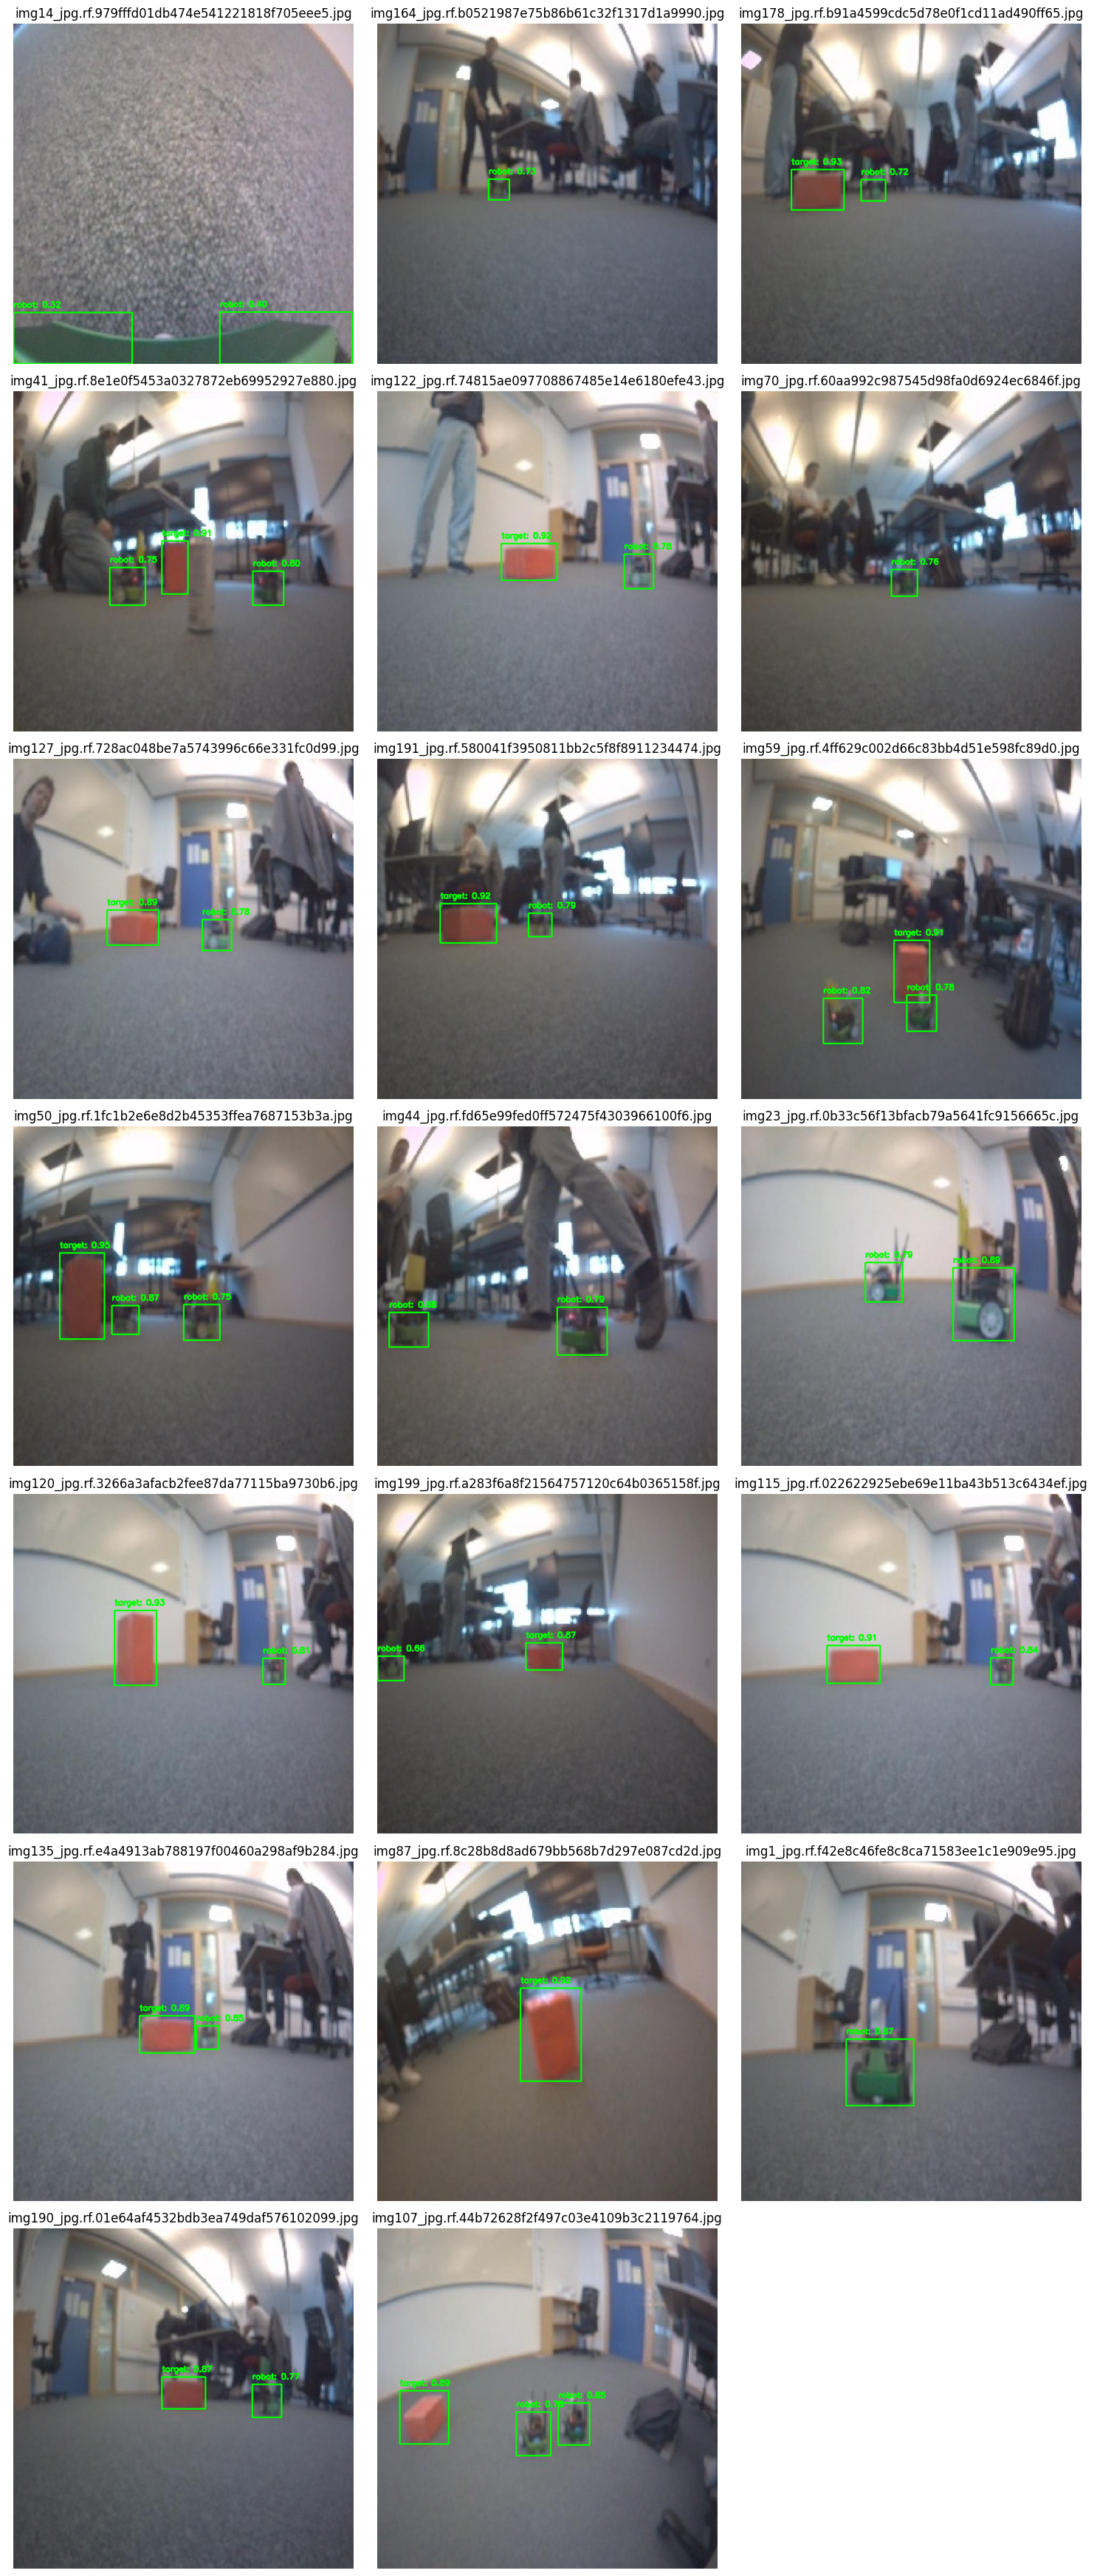

In [18]:
# Example usage
jetbot_ip = '194.47.156.140' # Replace with your Jetbot's IP address
# set_motors(jetbot_ip, 0.3, 0)
# move_left(jetbot_ip, 0.3)
# move_right(jetbot_ip, 0.3)
# move_forward(jetbot_ip, 0.3)
# stop_robot(jetbot_ip)
# display_camera_stream(jetbot_ip)
# print_camera(jetbot_ip)
# print_camera_yolo(jetbot_ip)
# take_pictures_loop(jetbot_ip)
detect_objects_in_folder("datasets/test/images")